**A1.2.**

In [115]:
#import necessary libraries
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [116]:
# Load the dataset
music_data = pd.read_csv("FIT1043-MusicGenre-Dataset.csv")

# Display the first few rows
print(music_data.head())
# Display the last few rows
print(music_data.tail())
# This helps verify that the dataset has loaded correctly and gives an insight into the data format.

   instance_id   artist_name                track_name  popularity  \
0        77382  Sheena Ringo                     獣ゆく細道          48   
1        23554   empty_field                Fossil Roo          22   
2        82886   The Beatles  Dear Prudence - 2018 Mix          62   
3        37772    Pink Floyd              Have a Cigar          64   
4        80191        A-Trak                      Push          43   

   acousticness  danceability  duration_ms  energy  instrumentalness  \
0       0.01340         0.423       224053   0.799          0.000004   
1       0.86200         0.590       151067   0.221          0.468000   
2       0.09040         0.395       234973   0.538          0.000453   
3       0.40700         0.454       307733   0.650          0.049800   
4       0.00145         0.642       213512   0.877          0.002790   

   liveness  loudness  speechiness    tempo  valence  music_genre  
0    0.1470    -4.227       0.0447  124.626   0.5560            1  
1    0.073

In [117]:
# Print the shape of the dataset to understand the dimensions (number of rows and columns)
# This is useful to confirm if the dataset size matches the expected number of entries.
print(music_data.shape)

(25958, 15)


In [118]:
# Display the column headers to ensure all expected columns are present
# Checking the column headers can help verify that all necessary data fields have been included.
print(music_data.columns)

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'music_genre'],
      dtype='object')


In [119]:
# Selecting columns for 'Input Data' from the dataset
X = music_data.iloc[:, 3:14]  #Input Data: Includes columns that contain various attributes of the songs

# Selecting columns for 'Label Data' from the dataset
y = music_data.iloc[:, 14]    #Label Data: 'music_genre' classification for each song

**A1.3.**

In [120]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X_train, y_train: These will contain 75% of the data and will be used for training the model.
# X_test, y_test: These will contain 25% of the data and will be used for testing the model's performance.
# 'test_size=0.25' specifies that 25% of the dataset should be set aside for the test set.
# 'random_state=0' ensures reproducibility of the results, meaning the split will be the same every time the script is run.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [121]:
# Create a scaler object to normalize the data by subtracting the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit on training data and transform it
# Fitting the scaler computes the mean and standard deviation for each feature in the training data.
# Transforming scales the training data according to these computed values.
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler that was fitted on the training data to transform the test data.
X_test_scaled = scaler.transform(X_test)

**A2.3c.**

**SVM algorithms model**

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Calculate an adjusted scale value for the gamma parameter of the SVM.
# Gamma defines how far the influence of a single training example reaches.
gamma_scale = 1 / (X_train_scaled.shape[1] * X_train_scaled.var())

# Initialize the SVC (Support Vector Classifier) with a random state for reproducibility.
svm_model = SVC(random_state=0)

# Define the parameter grid for GridSearchCV.
# 'C' is the regularization parameter
# 'gamma' influences the radius of the area of influence of the support vectors.
# 'kernel' specifies the kernel type to be used in the algorithm
# 'rbf' stands for radial basis function.
param_grid = {
    'C': [2, 3, 3.5, 4, 4.5, 5, 6],  
    'gamma': [0.1, 0.5, 1, gamma_scale, 2],  
    'kernel': ['rbf']
}

# Initialize GridSearchCV with the SVC model.
# The grid search will explore combinations of parameters specified in param_grid.
# 'cv=5' specifies 5-fold cross-validation.
# 'verbose=2' will show detailed messages while running the grid search.
# 'n_jobs=-1' tells the process to use all available CPU cores to speed up the training.
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the scaled training data.
# This process finds the best model parameters from the given grid.
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [2, 3, 3.5, 4, 4.5, 5, 6],
                         'gamma': [0.1, 0.5, 1, 0.09090909090909091, 2],
                         'kernel': ['rbf']},
             verbose=2)

**A2.4.**

**Random Forest algorithms model**

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest Classifier with a fixed random state for reproducibility.
random_forest_model = RandomForestClassifier(random_state = 0)

# Fit the Random Forest model on the scaled training data.
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

**Decision Tree algorithms model**

In [123]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with the entropy criterion and a fixed random state.
# The 'entropy' criterion is used to measure the quality of splits in the training data and to 
#handle the tree's growth.
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

# Fit the Decision Tree model on the scaled training data.
# This step involves creating a model that predicts the value 
# of a target variable by learning simple decision rules inferred from the data features.
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### **A3. Classification(prediction)**

**A3.1.**

**SVM algorithms model accuracies**

In [126]:
# Predict with the best SVM model found by GridSearchCV
svm_predictions = grid_search.best_estimator_.predict(X_test_scaled)

# Display the accuracies
accuracy_of_svm = accuracy_score(y_test, svm_predictions)
print("Accuracy of the SVM model for predicting the 'music_genre' label:")
print(accuracy_of_svm)

Accuracy of the SVM model for predicting the 'music_genre' label:
0.5696456086286594


**Decision Tree algorithms model accuracies**

In [124]:
# Decision Tree predictions
decision_tree_predictions = dt_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy_of_decision_tree = accuracy_score(y_test, decision_tree_predictions)

# Display the accuracy
print("Accuracy of the Decision Tree model for predicting the 'music_genre' label:")
print(accuracy_of_decision_tree)

Accuracy of the Decision Tree model for predicting the 'music_genre' label:
0.4406779661016949


**Random Forest algorithms model accuracies**

In [127]:
from sklearn.metrics import accuracy_score

# Random Forest predictions
random_forest_predictions = rf_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy_of_random_forest = accuracy_score(y_test, random_forest_predictions)

# Display the accuracies
print("Accuracy of the Random Forest model for predicting the 'music_genre' label:")
print(accuracy_of_random_forest)

Accuracy of the Random Forest model for predicting the 'music_genre' label:
0.5574730354391372


**A3.2.**

**Random Forest algorithms model confusion matrices (10x10)**

In [128]:
from sklearn.metrics import confusion_matrix

# Random Forest predictions
random_forest_predictions = rf_model.predict(X_test_scaled)

# Random Forest Confusion Matrix
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)

# Display the confusion matrices
print("Confusion Matrix for Random Forest:")
print(random_forest_confusion_matrix)

Confusion Matrix for Random Forest:
[[223   8  13   0  91  32  56  45  29 161]
 [ 16 494  37  44  13  20   0  11   0   4]
 [ 44  74 338   8  69  31   0  82   0  31]
 [ 18  24  14 560   3  11   0  31   0   8]
 [ 42   9  33   2 375   4   8  37  13 115]
 [ 42  33  44   7  19 364  13  72   9  28]
 [ 21   0   0   0   7   7 313   8 249  34]
 [ 25  11  91  48  37  88  10 326   5  34]
 [ 25   0   0   0   6   4 309   7 213  68]
 [ 84   2   5   2  38   6  36  11  36 412]]


**Decision Tree algorithms model confusion matrices(10x10)**

In [129]:
from sklearn.metrics import confusion_matrix

# Decision Tree predictions
decision_tree_predictions = dt_model.predict(X_test_scaled)

# Decision Tree Confusion Matrix
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# Display the confusion matrices
print("Confusion Matrix for Decision Tree:")
print(decision_tree_confusion_matrix)

Confusion Matrix for Decision Tree:
[[202  17  33  11  91  50  57  48  37 112]
 [ 18 438  54  54  19  35   2  12   4   3]
 [ 41  80 262  38  49  83   6  94   6  18]
 [ 11  47  18 507   9  15   2  50   0  10]
 [103  20  54   8 261  34  12  47  14  85]
 [ 59  45  73  17  31 272  13  87   9  25]
 [ 63   1   4   0  16  19 235  11 257  33]
 [ 51  17 101  50  53 108  15 239   9  32]
 [ 48   1   1   0  19   7 300   4 187  65]
 [110   5  27   4  83  18  35  26  67 257]]


**SVM algorithms model confusion matrices(10x10)**

In [130]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# SVM Confusion Matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Display the confusion matrix
print("Confusion Matrix for SVM:")
print(svm_confusion_matrix)

Confusion Matrix for SVM:
[[238   8   6   1 112  39  68  35  24 127]
 [ 16 489  47  36  14  24   0   8   0   5]
 [ 34  91 349   7  74  27   1  66   1  27]
 [ 19  25  17 565   3   7   0  26   0   7]
 [ 47  13  39   2 355  14  14  42  10 102]
 [ 39  25  38   8  39 373  17  64   6  22]
 [ 31   1   1   0   7   5 335   5 216  38]
 [ 33  13  88  41  36  91  20 325   3  25]
 [ 28   0   0   0   5   0 295   6 211  87]
 [ 67   0   1   2  34   3  25  11  32 457]]


**A3.3.**

In [131]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# SVM Confusion Matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Random Forest Confusion Matrix
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)

# Decision Tree Confusion Matrix
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Confusion Matrix for SVM:")
print(cm_svm)
print()
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print()
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

def compute_metrics(conf_matrix):
    # Compute overall accuracy
    accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
    
    # Compute precision, recall for each class
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    
    # Compute overall precision and recall
    overall_precision = np.nanmean(precision)
    overall_recall = np.nanmean(recall)
    
    # Compute specificity for each class
    specificity = []
    for i in range(len(conf_matrix)):
        true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
        false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        spec = true_negatives / (true_negatives + false_positives)
        specificity.append(spec)
    overall_specificity = np.nanmean(specificity)
    
    return accuracy, overall_precision, overall_recall, overall_specificity

# Compute metrics for SVM, RF, DT
metrics_svm = compute_metrics(svm_confusion_matrix)
metrics_rf = compute_metrics(random_forest_confusion_matrix)
metrics_dt = compute_metrics(decision_tree_confusion_matrix)

print()
print("SVM Metrics (Accuracy, Precision, Recall, Specificity):", metrics_svm)
print()
print("Random Forest Metrics (Accuracy, Precision, Recall, Specificity):", metrics_rf)
print()
print("Decision Tree Metrics (Accuracy, Precision, Recall, Specificity):", metrics_dt)

Confusion Matrix for SVM:
[[238   8   6   1 112  39  68  35  24 127]
 [ 16 489  47  36  14  24   0   8   0   5]
 [ 34  91 349   7  74  27   1  66   1  27]
 [ 19  25  17 565   3   7   0  26   0   7]
 [ 47  13  39   2 355  14  14  42  10 102]
 [ 39  25  38   8  39 373  17  64   6  22]
 [ 31   1   1   0   7   5 335   5 216  38]
 [ 33  13  88  41  36  91  20 325   3  25]
 [ 28   0   0   0   5   0 295   6 211  87]
 [ 67   0   1   2  34   3  25  11  32 457]]

Confusion Matrix for Random Forest:
[[223   8  13   0  91  32  56  45  29 161]
 [ 16 494  37  44  13  20   0  11   0   4]
 [ 44  74 338   8  69  31   0  82   0  31]
 [ 18  24  14 560   3  11   0  31   0   8]
 [ 42   9  33   2 375   4   8  37  13 115]
 [ 42  33  44   7  19 364  13  72   9  28]
 [ 21   0   0   0   7   7 313   8 249  34]
 [ 25  11  91  48  37  88  10 326   5  34]
 [ 25   0   0   0   6   4 309   7 213  68]
 [ 84   2   5   2  38   6  36  11  36 412]]

Confusion Matrix for Decision Tree:
[[202  17  33  11  91  50  57  48  37 

### **Performances Comparison**

### **SVM**: 

**Accuracy**: 0.5696456086286594

**Precision**: 0.5692095367758461

**Recall**: 0.5697265728670682

**Specificity**: 0.9522050320545301

### **Random Forest**: 

**Accuracy**: 0.5574730354391372

**Precision**: 0.558385318271333

**Recall**: 0.5574671706751476

**Specificity**: 0.9508506929417242

### **Decision Tree**: 

**Accuracy**: 0.4406779661016949

**Precision**: 0.4382916777841097

**Recall**: 0.4401806465302013

**Specificity**: 0.9378600915990232

The **Support Vector Machine (SVM)** demonstrated the highest level of accuracy, reaching 0.57. It was closely followed by the **Random Forest model**, which obtained an accuracy of 0.5575. In contrast, the **Decision Tree model** performed considerably worse, with an accuracy of only 0.44

### **Comparison and Justification**

The Support Vector Machine (SVM) algorithm proves to be the most efficient among the three algorithms that were tested. It attains the highest possible accuracy at around 0.57 and demonstrates excellent precision, recall, and specificity metrics. The proximity of the precision and recall values to the accuracy demonstrates a well-balanced capacity for precisely identifying true positives while reducing the occurrence of false positives and false negatives. The SVM's high specificity, approximately 0.952, indicates its extraordinary ability to accurately detect real negatives. This is particularly relevant in situations when it is critical to reduce false positives. This indicates that SVM is effectively dealing with the complexity and variety of the dataset, possibly gaining advantages from its capability to deal with high-dimensional data and its use of the RBF kernel, which can represent complicated boundaries.SVM best performance is attributed to its ability to effectively model non-linear decision boundaries using the kernel trick, as well as its ability to handle high-dimensional data.

The next algorithm is **Random Forest**, which demonstrates an adequate level of performance with an accuracy of around 0.557. Random Forest model is more preferable compared to the Decision Tree because it effectively minimizes the issue of overfitting, which is a common problem with single decision trees.The precision and recall figures, although marginally lower than those of the SVM, still demonstrate commendable predictive performance. Random Forest uses an ensemble approach that combines multiple decision trees to create a more accurate model. However, it is slightly less accurate and balanced compared to the SVM in this particular scenario. 

The **Decision Tree** model has the lowest performance, achieving an accuracy of approximately 0.44. This particular model is prone to high variance and overfitting, particularly when dealing with complicated datasets or datasets that contain numerous characteristics. The Decision Tree classifier exhibits a precision of 0.438 and a recall of 0.440, indicating the lowest effectiveness in accurately identifying positive cases and a substantial risk of both false positives and negatives. This is shown from the confusion matrix and accuracy score. While they are easier to interpret, they are generally less accurate, as demonstrated in this comparison, which makes them less suitable for complex or imbalanced datasets.

### **A4. Independent evaluation**

**A4.1.** & **A4.2.a**

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Test Accuracy: 0.5696456086286594


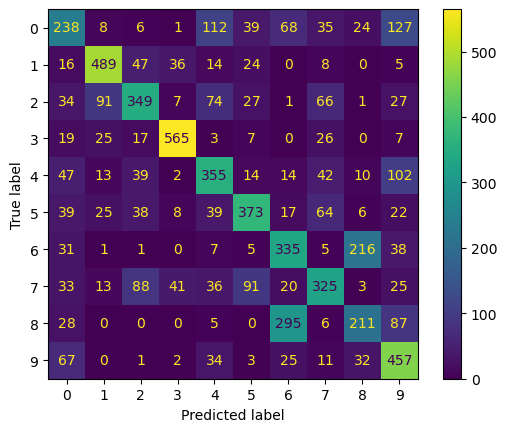

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset with labels
data = pd.read_csv("FIT1043-MusicGenre-Dataset.csv")

# Selecting columns for 'Input Data' from the dataset
X = data.iloc[:, 3:14]  #Input Data: Includes columns that contain various attributes of the songs
y = data.iloc[:, 14]    #Label Data: 'music_genre' classification for each song

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjusted gamma scale calculation
gamma_scale = 1 / (X_train_scaled.shape[1] * X_train_scaled.var())

# Setting up the parameter grid
param_grid = {
    'C': [2, 3, 3.5, 4, 4.5, 5, 6],
    'gamma': [0.1, 0.5, 1, gamma_scale, 2],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit grid_search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_svm.predict(X_test_scaled)

# Print accuracy and display confusion matrix
print("Test Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Load the submission dataset
submission_data = pd.read_csv("FIT1043-MusicGenre-Submission.csv")

# Selecting columns for 'Input Data' from the submission dataset
X_submission = submission_data.iloc[:, 3:14]  # Ensure this matches the training data exactly

# Feature scaling for the submission dataset
X_submission_scaled = scaler.transform(X_submission)

# Predict using the trained best SVM model
submission_predictions = best_svm.predict(X_submission_scaled)

# Store the predictions in a DataFrame
submission_data['music_genre'] = submission_predictions


result_df = submission_data[['instance_id', 'music_genre']]

# Save the results to a CSV file name "34035958-ChaiShouZheng-v2.csv"
result_df.to_csv("34035958-ChaiShouZheng-v2.csv", index=False)